# Non-parametric Control Chart

The standard assumptions for a control chart are:
    1. Normally Distributed Data
    2. Single Source of Variation
    3. Independence.
This chart applies when assumption 1 is not met. 

A requirement is that the number of data points shoulb be at least 100.

### Import libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import anderson
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
raw=pd.read_csv("SerumData.csv")
#raw.head()

,500Ml,Weight,SKU,Lot,Pump,Station
0,5.9,515.9,16000,491330,14,64
1,6.7,516.7,16000,491330,14,64
2,5.9,515.9,16000,491330,14,64
3,7.5,517.5,16000,491330,14,64
4,8.6,518.6,16000,491330,14,64


In [5]:
y = raw['Weight'].to_numpy()

In [25]:
#print(y)

Build a histogram and compute basic statistics: $\bar{x}$ and $\hat{\sigma}$

In [12]:
sigma=statistics.stdev(y)
x_bar=statistics.mean(y)

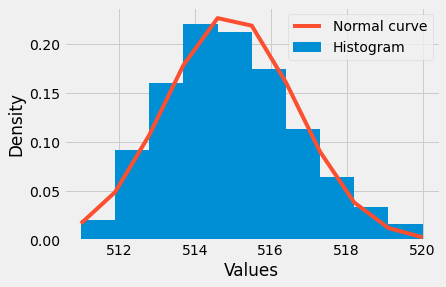

In [17]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y, density=True, label="Histogram")
yn = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - x_bar))**2))
ax.plot(bins, yn, label="Normal curve")
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.legend()

### Anderson-Darling normality test

In [15]:
AD, cv, sl=anderson(y)
if AD > cv[2]:
  print("Reject Ho: Data is not normal")
elif AD <= cv[2]:
  print("Cannot reject Ho: Data is normal")
print("Significance level is: ",sl[2], "%")

Reject Ho: Data is not normal
Significance level is:  5.0 %


### Probability plot

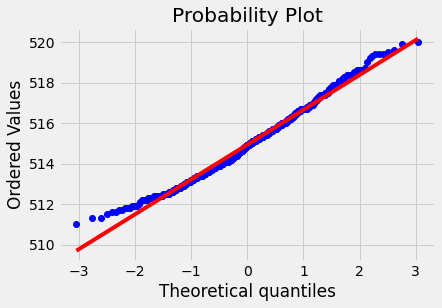

In [16]:
from scipy.stats import probplot
probplot(y,dist="norm", plot=plt)
plt.show()

## Calculating control limits

In [18]:
UCLx=np.percentile(y, 0.5)
LCLx=np.percentile(y, 99.5)
CL=np.percentile(y, 50)

In [19]:
print("UCLx= " + repr(UCLx))
print("LCLx= " + repr(LCLx))
print("CL= " + repr(CL))

UCLx= 511.488
LCLx= 519.506
CL= 514.9


In [21]:
# Horizontal values
meas=np.linspace(1, y.shape[0], y.shape[0])
#print(meas)

In [22]:
uclx=np.full((y.shape[0], 1), UCLx)
lclx=np.full((y.shape[0], 1), LCLx)
cl=np.full((y.shape[0], 1), CL)
#print(uclx)

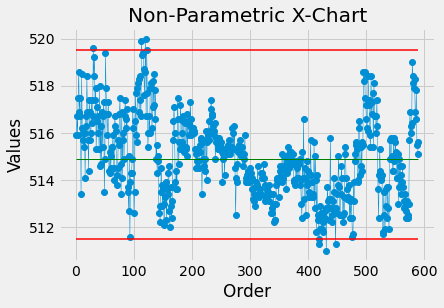

In [24]:
plt.figure(0)
#plt.subplot(211)
plt.plot(meas, y, marker= 'o',linewidth=0.5)
plt.plot(meas,uclx, 'r-',linewidth=1.5)
plt.plot(meas,lclx, 'r-', linewidth=1.5)
plt.plot(meas,cl, 'g-', linewidth=1.0)
plt.xlabel('Order')
plt.ylabel("Values")
plt.title("Non-Parametric X-Chart")
plt.show()